# Tarea 9

In [96]:
import random
import numpy as np
import cvxpy as cp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from sklearn.linear_model import LinearRegression

## Problem 1: On matrices

In [97]:
x = np.array([
    [1, 1.75],
    [1, 1.68],
    [1, 1.82],
    [1, 1.60],
    [1, 1.77],
    [1, 1.69],
    [1, 1.73],
    [1, 1.80],
    [1, 1.66],
    [1, 1.78],
    [1, 1.74],
    [1, 1.65],
    [1, 1.70],
    [1, 1.81],
    [1, 1.67],
    [1, 1.76],
    [1, 1.63],
    [1, 1.79],
    [1, 1.71],
    [1, 1.64]
])

y = np.array([
    72, 65, 78, 58, 75, 64, 70, 80, 62, 76,
    71, 60, 68, 79, 63, 74, 59, 77, 69, 61
])

- $ \beta = (X^TX)^{-1}Y^TX $
- $ c = X^TX $
- $ d = Y^TX $
- $ c_{inv} = (X^TX)^{-1} $
- $ beta = c_{inv}d $

### 1: Calcular $X^TX$

In [98]:
c = np.dot(x.T, x)
c

array([[20.    , 34.38  ],
       [34.38  , 59.1806]])

### 2: Obtención de $\sigma (X^TX)$

In [99]:
valores_propios, vectores_propio = np.linalg.eig(c)
valores_propios[0], valores_propios[1]

(0.020560879176876767, 79.16003912082311)

Es posible invertir la matriz $X^TX$ ya que ninguno de sus valores propios son 0.

### 3: Calcular $(X^TX)^{-1} Y^T X$

In [100]:
c_inv = np.linalg.inv(c)
beta = np.dot(c_inv, np.dot(x.T, y))
for i, b in enumerate(beta):
    print(f"B{i} = {b}")

B0 = -117.69955763084822
B1 = 108.63848611451255


### 4: What problem one has with the $X^TX$ matrix when the matrix $X$ is not of full rank in its columns, i.e., one or more of its columns is a linear combination of other columns.


In [101]:
# pendiente hacer los cálculos a mano

## Problem 2: Simple Linear Regression

### 1: Use $\hat{\beta} = (X^TX)^{-1} Y^T X$, to find $\beta = [\beta_0,\beta_1]^T$

In [102]:
c_inv = np.linalg.inv(c)
beta = np.dot(c_inv, np.dot(x.T, y))
for i, b in enumerate(beta):
    print(f"B{i} = {b}")

B0 = -117.69955763084822
B1 = 108.63848611451255


### 2: Calculate the estimate $\hat\beta$ using CVXPY

In [103]:
# Define and solve the CVXPY problem for least squares.
beta = cp.Variable(2)
objective = cp.Minimize(cp.sum_squares(x @ beta - y))
prob = cp.Problem(objective)
prob.solve()

# Print the result.
print("\nThe optimal value is", prob.value)
print("The optimal beta is", beta.value)
print("The norm of the residual is ", cp.norm(x @ beta - y, p=2).value)


The optimal value is 22.477144261489215
The optimal beta is [-117.69955763  108.63848611]
The norm of the residual is  4.741006671740635


### 3: Calculate the estimate $\hat\beta$ using Scikit-Learn

In [104]:
x_sklearn = np.array([
    [1.75], [1.68], [1.82], [1.60], [1.77], [1.69], [1.73], [1.80], [1.66], [1.78],
    [1.74], [1.65], [1.70], [1.81], [1.67], [1.76], [1.63], [1.79], [1.71], [1.64]
])

In [105]:
X = x_sklearn
y_sklearn = y 

model = LinearRegression().fit(X, y_sklearn)
model.intercept_ ,model.coef_[0]

(-117.69955763086746, 108.63848611452441)

## Problem 3: Multiple linear regression

In [106]:
df = pd.read_excel('Tarea 9.xlsx')
df.head()

,Ones,Height,PAL,BMR,Weight
0,1,1.75,1.6,1650,72
1,1,1.68,1.5,1500,65
2,1,1.82,1.8,1800,78
3,1,1.60,1.4,1400,58
4,1,1.77,1.7,1700,75


### 1: Direct formula

In [107]:
x_multi = np.array(df.iloc[:, :4])
y_multi = np.array(df['Weight'])

In [108]:
c = np.dot(x_multi.T, x_multi)
c_inv = np.linalg.inv(c)
beta = np.dot(c_inv, np.dot(x_multi.T, y_multi))
for i, b in enumerate(beta):
    print(f"B{i} = {b}")

B0 = -57.24022393900668
B1 = 46.00789572193753
B2 = -3.9696423101995606
B3 = 0.03335466085849248


### 2: Using CVXPY

In [109]:
# Define and solve the CVXPY problem for least squares.
beta = cp.Variable(4)
objective = cp.Minimize(cp.sum_squares(x_multi @ beta - y_multi))
prob = cp.Problem(objective)
prob.solve()

# Print the result.
print("\nThe optimal value is", prob.value)
for i, b in enumerate(beta.value):
    print(f"B{i} = {b}")
print("The norm of the residual is ", cp.norm(x_multi @ beta - y_multi, p=2).value)


The optimal value is 12.902511656399936
B0 = -57.24022393926593
B1 = 46.007895722253046
B2 = -3.9696423102043816
B3 = 0.033354660858248585
The norm of the residual is  3.5920066336798344


### 3: Using Scikit-Learn

In [110]:
x_multi_sk = df.iloc[:, 1:4]
y_multi_sk = df['Weight']

In [111]:
X = x_multi_sk
y_sklearn = y_multi_sk 

model = LinearRegression().fit(X, y_sklearn)
model.intercept_ ,model.coef_[0], model.coef_[1], model.coef_[2]

(-57.24022393900688,
 46.00789572201302,
 -3.9696423101795104,
 0.03335466085831953)

## Problem 4: Polynomial Regression

### Obtención de modelos polinomiales y sus gráifcas

In [112]:
df_poly = pd.read_excel('Tarea 9.xlsx', sheet_name=1)
df_poly.head()

,Ones,Height,Height^2,Height^3,Height^4,Height^5,Weight
0,1,1.75,3.0625,5.359375,9.378906,16.413086,72
1,1,1.68,2.8224,4.741632,7.965942,13.382782,65
2,1,1.82,3.3124,6.028568,10.971994,19.969029,78
3,1,1.60,2.5600,4.096000,6.553600,10.485760,58
4,1,1.77,3.1329,5.545233,9.815062,17.372660,75


In [113]:
variables = ['Ones','Height', 'Height^2', 'Height^3', 'Height^4', 'Height^5']

x = np.array(df_poly[variables])
y = np.array(df_poly[['Weight']])

def grafica(x, betas):
    y = np.zeros_like(x)
    for i, b in enumerate(betas):
        y += b * x**i
    return y

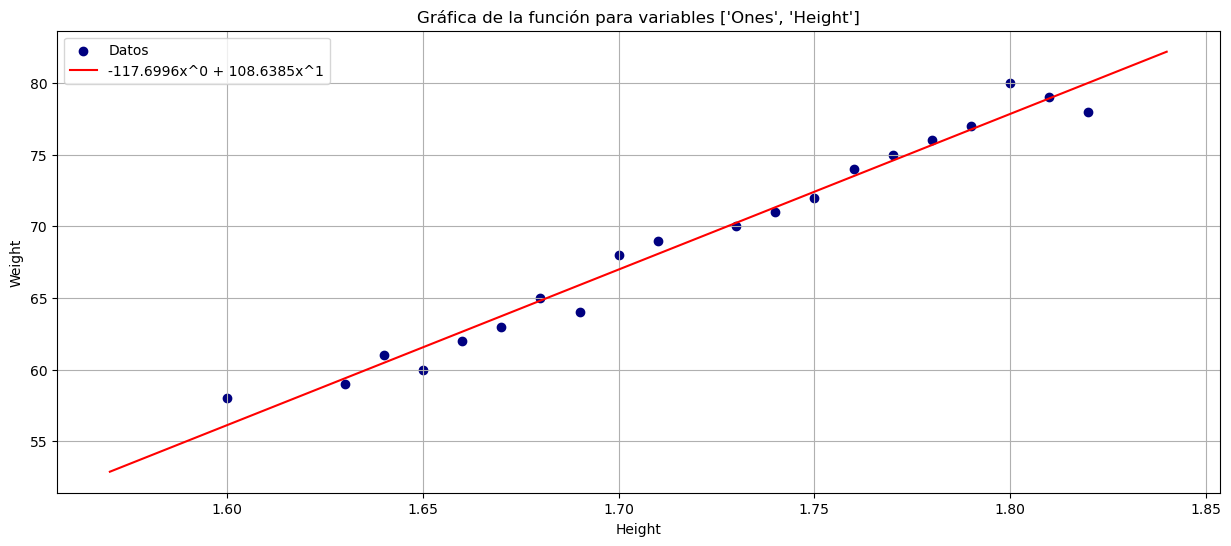

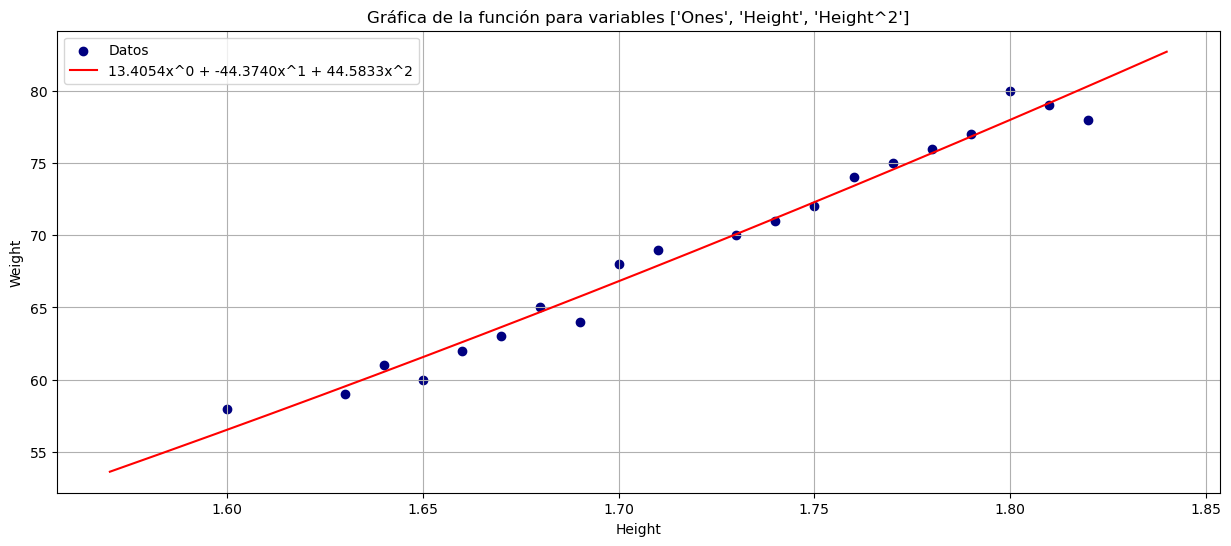

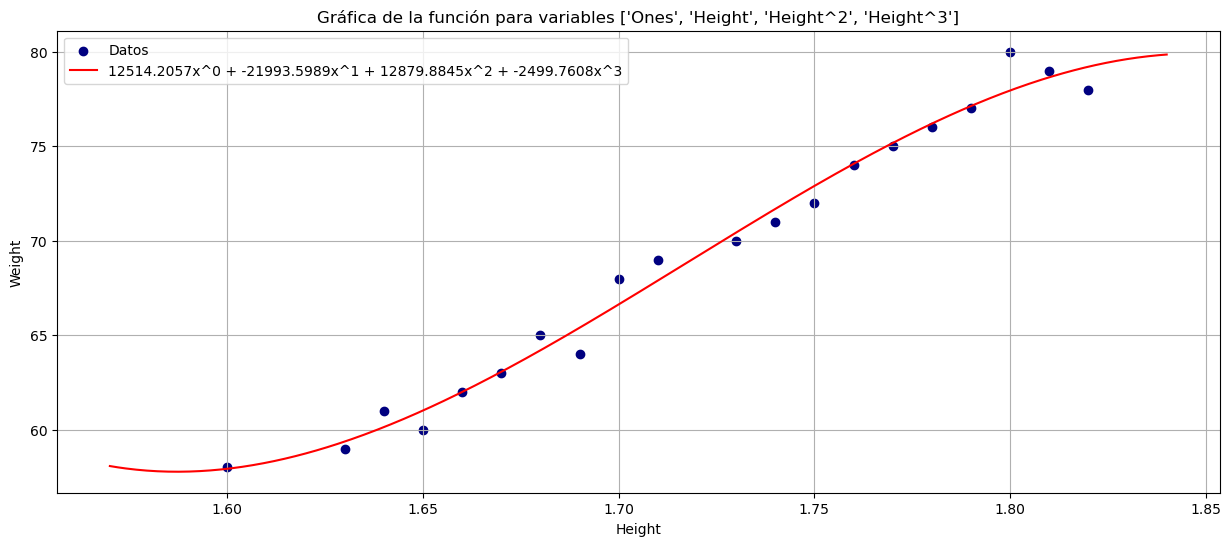

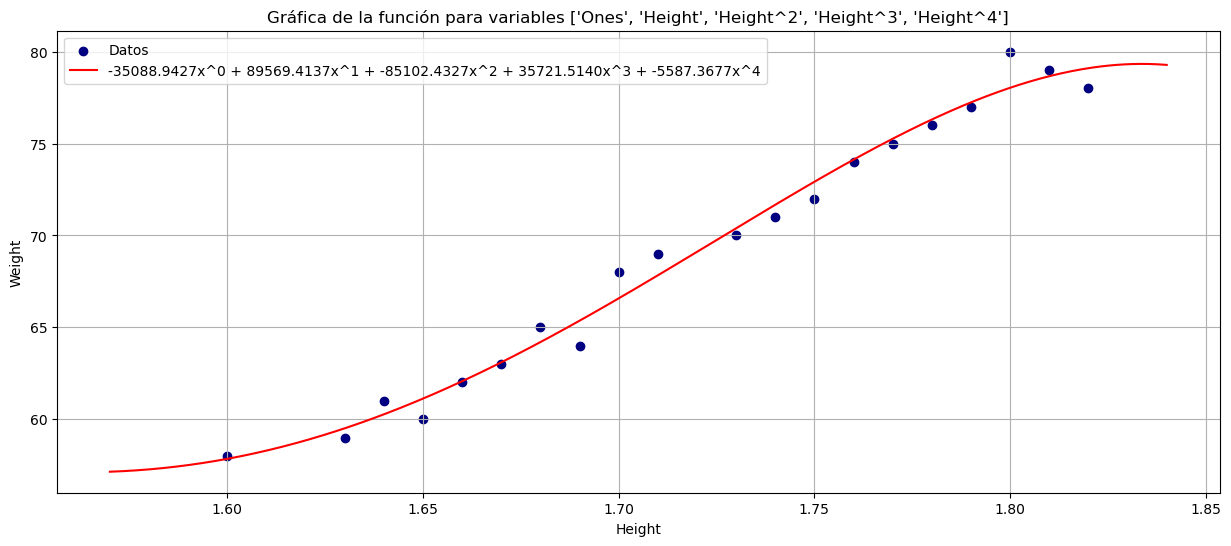

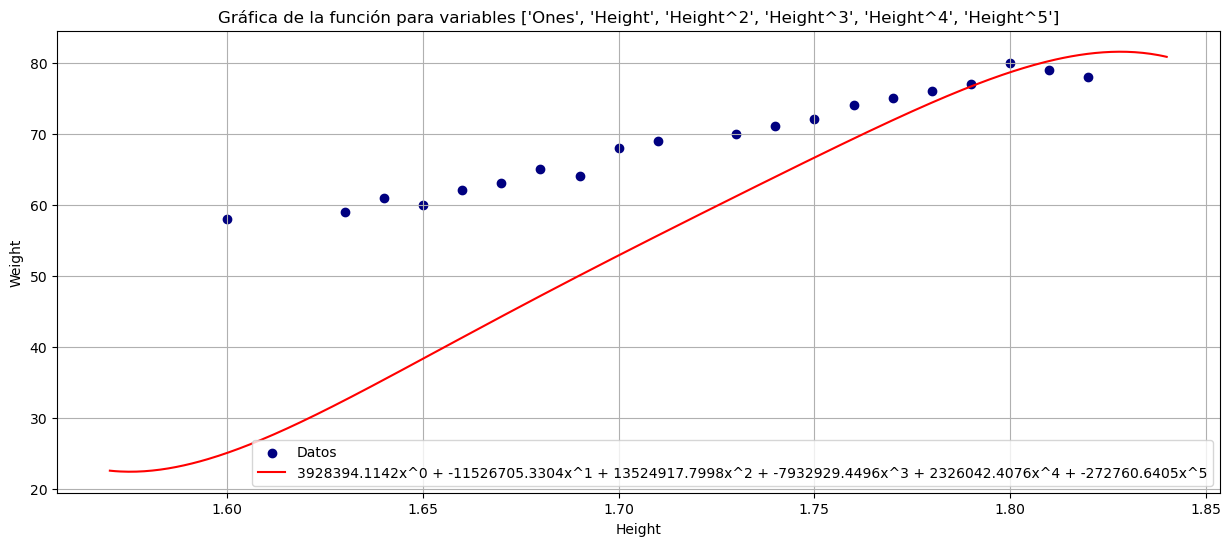

In [114]:
valores_propios_list=[]
for i in range(2, len(variables) + 1):
    x_subset = np.array(df_poly[variables[:i]])
    c = np.dot(x_subset.T, x_subset)
    d = np.dot(x_subset.T, y)
    det = np.linalg.det(c)
    valores_propios, vectores_propio = np.linalg.eig(c)
    valores_propios_list.append(valores_propios)

            
    if det > 0:
        c_inv = np.linalg.inv(c)
        beta = np.dot(c_inv, d)
        betas = [b[0] for b in beta]
                
        # Crear un rango de valores para x
        x_range = np.linspace(1.57, 1.84, 400)
            
        # Calcular los valores de y
        y_range = grafica(x_range, betas)
                
        # Graficar
        plt.figure(figsize=(15, 6))
        plt.scatter(df_poly['Height'], df_poly['Weight'], color='navy', label='Datos')
                
        equation = " + ".join([f"{b:.4f}x^{j}" for j, b in enumerate(betas)])
        plt.plot(x_range, y_range, label=equation, c='red')
                
        plt.xlabel("Height")
        plt.ylabel("Weight")
        plt.title(f"Gráfica de la función para variables {variables[:i]}")
        plt.legend()
        plt.grid()
        plt.show()
    else:
       print(f"Matrix X^T X is not invertible for variables {variables[:i]}")

### Explicación del incremento en los parámetros

In [115]:
for i in range (len(valores_propios_list)):
    print(f'Valores propios de X^TX para el modelo de orden {i+1}: {valores_propios_list[i]}')
    print()

Valores propios de X^TX para el modelo de orden 1: [2.05608792e-02 7.91600391e+01]

Valores propios de X^TX para el modelo de orden 2: [2.55119841e+02 1.36769156e-01 1.29482315e-05]

Valores propios de X^TX para el modelo de orden 3: [7.81358078e+02 5.77400839e-01 1.29731179e-04 8.61085683e-09]

Valores propios de X^TX para el modelo de orden 4: [2.36356819e+03 2.00934343e+00 7.54709370e-04 1.16279747e-07
 4.26307947e-12]

Valores propios de X^TX para el modelo de orden 5: [7.14510598e+03 6.36241943e+00 3.34302664e-03 8.79915880e-07
 7.21172499e-11 4.18816530e-14]



Si se tiene la matriz $A$


\begin{bmatrix}
\alpha_1 & 0 \\
0 & \alpha_2 \\
\end{bmatrix}


enotnces $\sigma (A)$ = ($\alpha_1, \alpha_2$) y $A^{-1}$

\begin{bmatrix}
\frac{1}{\alpha_1} & 0 \\
0 & \frac{1}{\alpha_2} \\
\end{bmatrix}

con $\sigma (A^{-1})$ = ($\frac{1}{\alpha_1},\frac{1}{\alpha_2}$).

Por lo tanto si los valores propios de $A$ son mu pequeños los valores de la matriz $A^{-a}$ van a ser muy grandes. Aplicado a nuestro problema significa que si los valores propios de $X^TX$ son pequeños entonces los valores de la matriz $(X^TX)^{-1}$ van a ser muy grandes y al ser multiplicados por $Y^TX$ los valores resultantes para $\hat\beta$ van a ser muy altos. Y como podemos ver mientras se incremente el grado del modelo, los valores propios de $X^TX$ son cada vez más pequeños.


### Regularización RIDGE

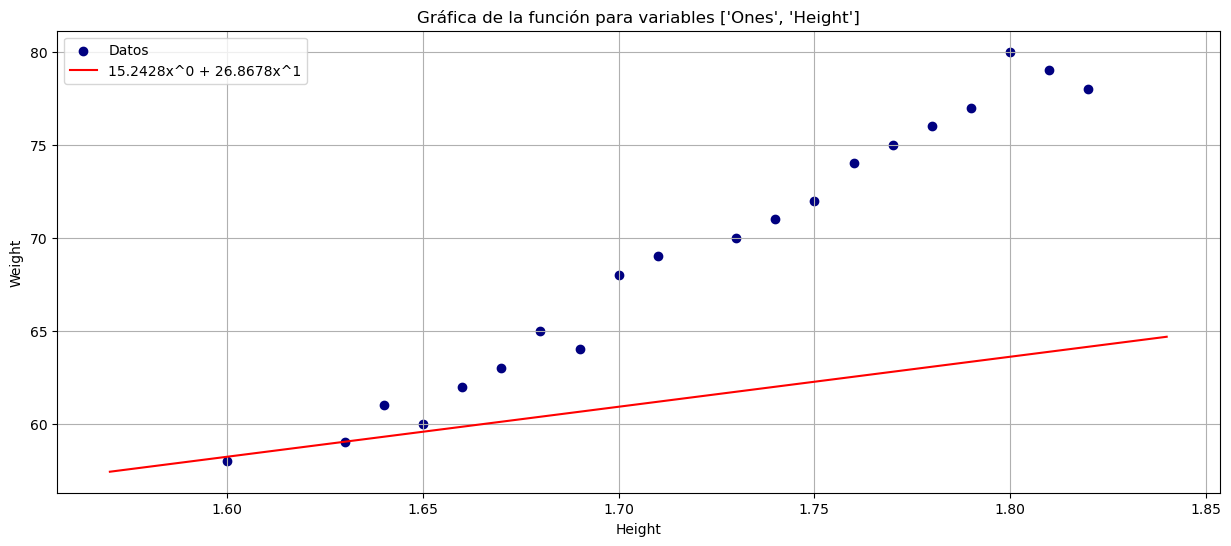

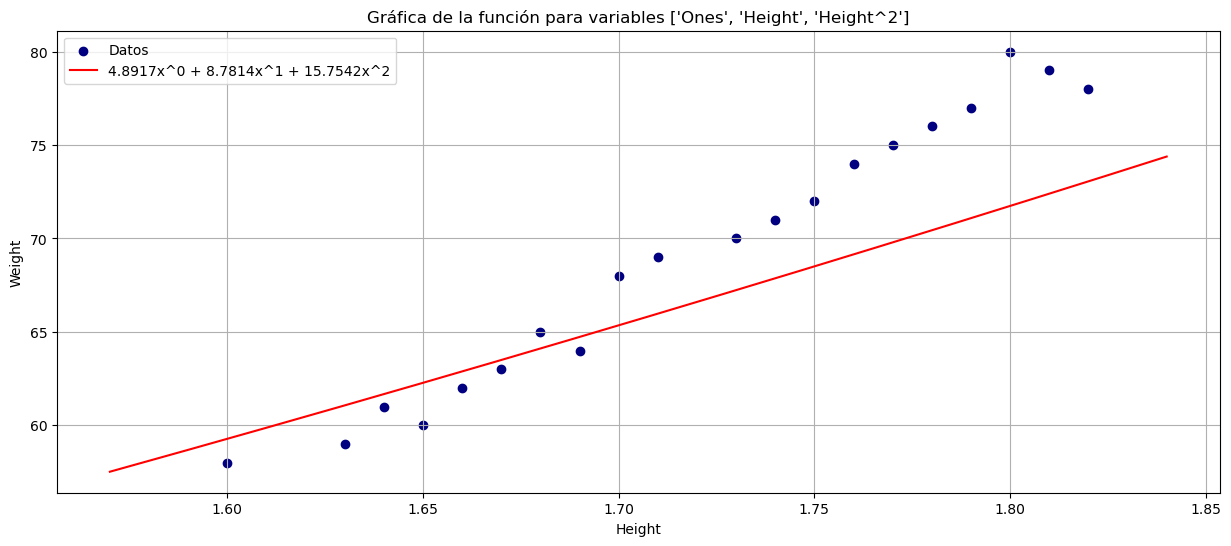

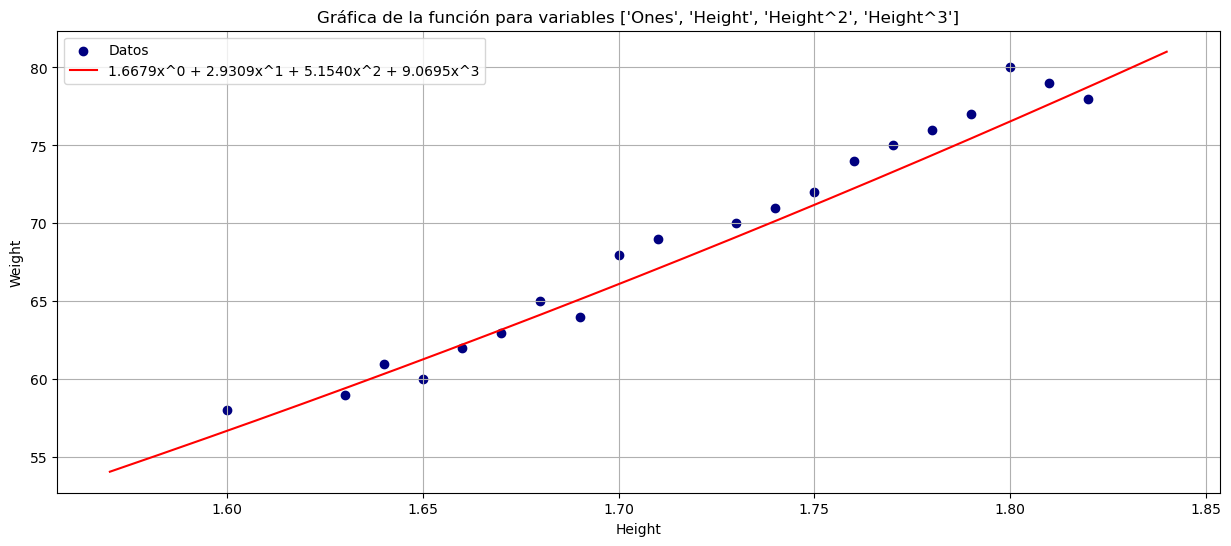

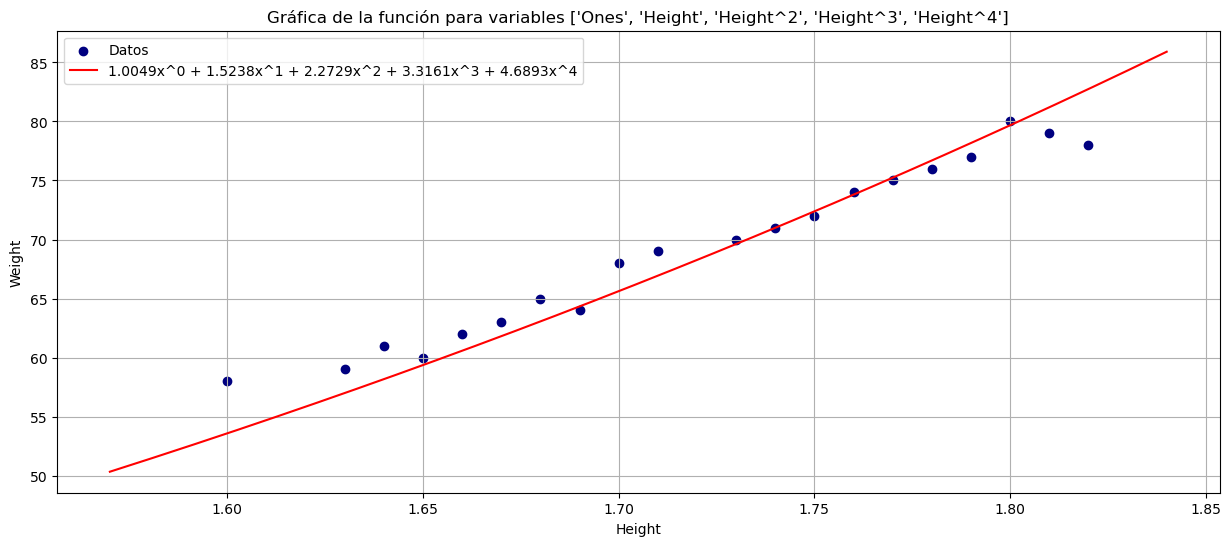

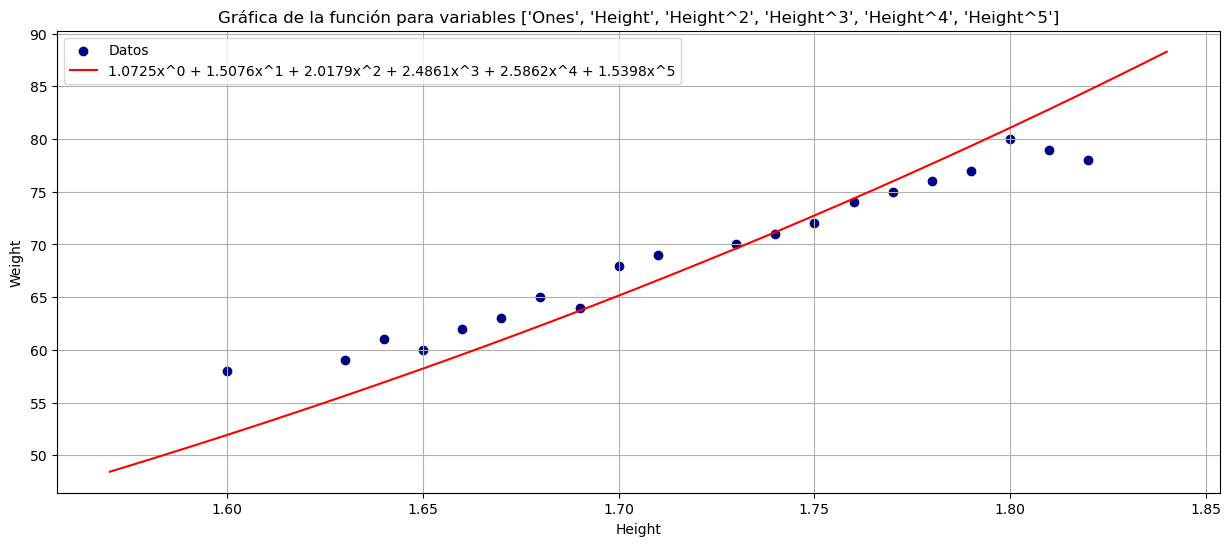

In [116]:
valores_propios_list=[]
for i in range(2, len(variables) + 1):
    x_subset = np.array(df_poly[variables[:i]])
    c = np.dot(x_subset.T, x_subset)
    d = np.dot(x_subset.T, y)

    lambda_I = 10 * np.identity(i)
    c_i = c+lambda_I

    c_inv = np.linalg.inv(c_i)
    valores_propios, vectores_propio = np.linalg.eig(c_i)
    valores_propios_list.append(valores_propios)

    beta = np.dot(c_inv, d)
    betas = [b[0] for b in beta]
                
    # Crear un rango de valores para x
    x_range = np.linspace(1.57, 1.84, 400)
            
    # Calcular los valores de y
    y_range = grafica(x_range, betas)
                
    # Graficar
    plt.figure(figsize=(15, 6))
    plt.scatter(df_poly['Height'], df_poly['Weight'], color='navy', label='Datos')
                
    equation = " + ".join([f"{b:.4f}x^{j}" for j, b in enumerate(betas)])
    plt.plot(x_range, y_range, label=equation, c='red')
                
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title(f"Gráfica de la función para variables {variables[:i]}")
    plt.legend()
    plt.grid()
    plt.show()

### Explicación del funcionamiento de la regularización RIDGE

In [117]:
for i in range (len(valores_propios_list)):
    print(f'Valores propios de X^TX para el modelo de orden {i+1}: {valores_propios_list[i]}')
    print()

Valores propios de X^TX para el modelo de orden 1: [10.02056088 89.16003912]

Valores propios de X^TX para el modelo de orden 2: [265.1198412   10.13676916  10.00001295]

Valores propios de X^TX para el modelo de orden 3: [791.35807766  10.57740084  10.00012973  10.00000001]

Valores propios de X^TX para el modelo de orden 4: [2373.56819087   12.00934343   10.00075471   10.00000012   10.        ]

Valores propios de X^TX para el modelo de orden 5: [7155.10598163   16.36241943   10.00334303   10.00000088   10.
   10.        ]



En el proceso de regularización RIDGE, $\hat\beta$ se calcula de la siguiente manera:
$$
\hat\beta = (X^TX + \lambda I)^{-1} Y^TX
$$

Al sumarle $\lambda I$ a $X^TX$ se modifican los valores de la matriz, provocando que sus valores propios sean mayores como se muestra en el código de arriba, por lo que los valores que se obtienen al invertir la matriz son menores, lo cual ayuda a que no incrementen mucho los valores de $\hat\beta$. Mientras el valor de $\lambda$ es mayor los valores de los parámetros son más chicos, sin embargo, aumentar mucho $\lambda$ se sacrifica precisión del modelo, lo cual se puede apreciar en las gráficas.